In [2]:
import pandas as pd
import sqlite3

## make a connection to the database (it is the same as the previous day)

In [3]:
connection = sqlite3.connect("../../data/checking-logs.sqlite")

## run a query that gets the datetime from the pageviews table, selecting only the users and not the admins

In [26]:
datetime = pd.read_sql("SELECT datetime FROM pageviews WHERE uid LIKE 'user_%'", connection)

In [27]:
datetime["datetime"] = pd.to_datetime(datetime["datetime"]).dt.to_period('D')
datetime.dtypes

datetime    period[D]
dtype: object

In [28]:
datetime.head()

,datetime
0,2020-04-17
1,2020-04-18
2,2020-04-18
3,2020-04-18
4,2020-04-18


## using Pandas, create a new dataframe where the visits are counted and grouped by date

In [66]:
views = pd.concat([pd.Series([1]*datetime.size, name='views'), datetime['datetime'].astype('str').rename('date')], axis=1)

In [67]:
views = views.groupby(by='date').sum()

In [68]:
views.head()

,views
date,
2020-04-17,1
2020-04-18,23
2020-04-19,15
2020-04-21,3
2020-04-22,1


## using Pandas method .plot(), create a graph
    * the size of the font should be 8
    * the size of the figure is (15,8)
    * the graph must have the title Views per day
    * notice the rotation of xticks on the graph below


<Axes: title={'center': 'Veiws per day'}, xlabel='date'>

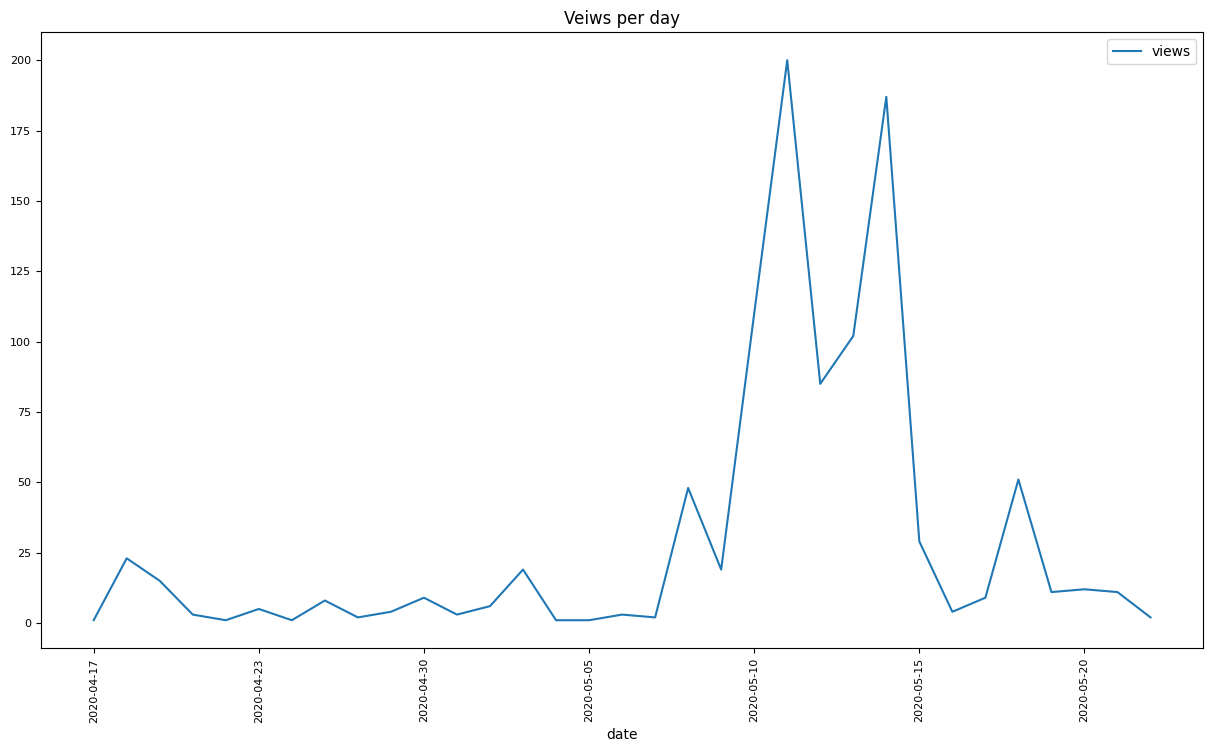

In [69]:
views.plot(fontsize=8, figsize=(15, 8), title='Veiws per day', rot=90)

## close the connection to the database

In [70]:
connection.close()